In [139]:
import pandas as pd
import networkx as nx
import numpy as np
import community as community_louvain
from collections import defaultdict

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score

# Trabajo de Topic Modeling (A simple Excercise)

##### Integrantes:
- Juan Aristizabal
- Domenica Escobar
- Jossue Játiva
- Enrique Merizalde

### Descargar el CSV

En la siguiente parte se mostrara como se lee el CSV con el pandas para cargar el archivo CSV

In [140]:
# Cargar el dataset directamente desde la URL
url = 'https://raw.githubusercontent.com/marsgr6/estadistica-ux/main/data/words_ux.csv'
df = pd.read_csv(url)

# Mostrar las primeras filas
print("Primeras filas del dataset original:")
print(df.head())

# Verificar información general
print("\nInformación del dataset:")
print(df.info())

Primeras filas del dataset original:
                                               Words
0     Boring Consistent EasyToUse Fast Simple Useful
1  Boring Confusing Contradictory Difficult EasyT...
2             Confusing Fast Old Unattractive Useful
3               Complex Confusing Creative Difficult
4    Advanced Clean Credible Difficult Effective New

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Words   52 non-null     object
dtypes: object(1)
memory usage: 548.0+ bytes
None


### Eliminar datos duplicados y filas con valores faltantes

In [141]:
# 1. Eliminar filas con valores faltantes
df.dropna(inplace=True)

# 2. Eliminar duplicados
df.drop_duplicates(inplace=True)

### Resultado final de limpiar el dataset

In [142]:
# Resultado final
print("\nDataset después del preprocesamiento:")
print(df.head())
print(f"\nNúmero de documentos (usuarios): {len(df)}")


Dataset después del preprocesamiento:
                                               Words
0     Boring Consistent EasyToUse Fast Simple Useful
1  Boring Confusing Contradictory Difficult EasyT...
2             Confusing Fast Old Unattractive Useful
3               Complex Confusing Creative Difficult
4    Advanced Clean Credible Difficult Effective New

Número de documentos (usuarios): 52


### Construccion del DTM

In [143]:
# Paso 2: Crear la DTM
documents = df['Words'].astype(str)  # Asegurar que todo es texto

# Crear vectorizador binario
vectorizer = CountVectorizer(binary=True, token_pattern=r'[^, ]+')

# Ajustar el vectorizador y transformar los documentos
dtm = vectorizer.fit_transform(documents)

# Convertir a DataFrame para visualizar
dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())

# Mostrar parte de la DTM
print("Document-Term Matrix (DTM):")
print(dtm_df.head())
print(f"\nTamaño de la DTM: {dtm_df.shape} (Documentos x Palabras únicas)")

dtm_array = dtm.toarray()


Document-Term Matrix (DTM):
   advanced  ambiguous  attractive  boring  bright  busy  clean  clear  \
0         0          0           0       1       0     0      0      0   
1         0          0           0       1       0     0      0      0   
2         0          0           0       0       0     0      0      0   
3         0          0           0       0       0     0      0      0   
4         1          0           0       0       0     0      1      0   

   complex  comprehensive  ...  too-technical  trustworthy  unattractive  \
0        0              0  ...              0            0             0   
1        0              0  ...              0            0             0   
2        0              0  ...              0            0             1   
3        1              0  ...              0            0             0   
4        0              0  ...              0            0             0   

   unconventional  understandable  unpredictable  unrefined  usable  u

### Ver similitudes de palabras

#### Por el Coseno

In [144]:
cos_sim_matrix = cosine_similarity(dtm_array)
cos_sim_df = pd.DataFrame(cos_sim_matrix)

print("Matriz de Similitud - Coseno:")
print(cos_sim_df.round(2).head())

Matriz de Similitud - Coseno:
     0     1     2     3    4     5     6     7     8     9   ...    42    43  \
0  1.00  0.41  0.37  0.00  0.0  0.47  0.29  0.26  0.52  0.41  ...  0.26  0.23   
1  0.41  1.00  0.22  0.25  0.2  0.29  0.00  0.24  0.32  0.25  ...  0.00  0.28   
2  0.37  0.22  1.00  0.22  0.0  0.00  0.63  0.14  0.28  0.18  ...  0.14  0.25   
3  0.00  0.25  0.22  1.00  0.2  0.00  0.00  0.16  0.16  0.10  ...  0.16  0.28   
4  0.00  0.20  0.00  0.20  1.0  0.00  0.00  0.26  0.26  0.41  ...  0.13  0.45   

     44    45    46    47    48   49    50    51  
0  0.24  0.17  0.18  0.00  0.00  0.0  0.00  0.00  
1  0.36  0.10  0.00  0.00  0.18  0.0  0.11  0.20  
2  0.13  0.00  0.00  0.00  0.00  0.0  0.00  0.00  
3  0.14  0.00  0.22  0.38  0.18  0.0  0.00  0.20  
4  0.00  0.17  0.18  0.46  0.29  0.0  0.18  0.33  

[5 rows x 52 columns]


#### Por Jaccard

In [145]:
# Se calcula manualmente fila a fila para todos los pares
def jaccard_similarity_matrix(X):
    n = X.shape[0]
    sim_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            sim_matrix[i][j] = jaccard_score(X[i], X[j])
    return sim_matrix

jacc_sim_matrix = jaccard_similarity_matrix(dtm_array)
jacc_sim_df = pd.DataFrame(jacc_sim_matrix)

print("\nMatriz de Similitud - Jaccard:")
print(jacc_sim_df.round(2).head())


Matriz de Similitud - Jaccard:
     0     1     2     3     4     5     6     7     8     9   ...    42  \
0  1.00  0.22  0.22  0.00  0.00  0.29  0.14  0.14  0.33  0.19  ...  0.14   
1  0.22  1.00  0.11  0.11  0.10  0.12  0.00  0.13  0.18  0.14  ...  0.00   
2  0.22  0.11  1.00  0.12  0.00  0.00  0.40  0.07  0.15  0.07  ...  0.07   
3  0.00  0.11  0.12  1.00  0.11  0.00  0.00  0.08  0.08  0.04  ...  0.08   
4  0.00  0.10  0.00  0.11  1.00  0.00  0.00  0.14  0.14  0.19  ...  0.07   

     43    44    45    46    47    48   49    50    51  
0  0.12  0.12  0.09  0.10  0.00  0.00  0.0  0.00  0.00  
1  0.16  0.22  0.05  0.00  0.00  0.09  0.0  0.05  0.10  
2  0.12  0.06  0.00  0.00  0.00  0.00  0.0  0.00  0.00  
3  0.13  0.07  0.00  0.12  0.22  0.09  0.0  0.00  0.11  
4  0.27  0.00  0.09  0.10  0.30  0.17  0.0  0.10  0.20  

[5 rows x 52 columns]


### Codigo para construir y recortar el grafico de similitudes
Se realiza por el percentil 75 para mantener las conexiones mas fuertes sin sobre-recortar

#### Funcion para crear el grafico de documentacion

In [146]:
def build_document_graph(similarity_matrix, threshold_percentile=75, title="Document Graph"):
    # Convertir a matriz numpy si es DataFrame
    if isinstance(similarity_matrix, pd.DataFrame):
        similarity_matrix = similarity_matrix.values
    
    n_docs = similarity_matrix.shape[0]
    G = nx.Graph()

    # Agregar nodos
    G.add_nodes_from(range(n_docs))

    # Calcular umbral
    sim_scores = similarity_matrix[np.triu_indices(n_docs, k=1)]  # parte superior sin diagonal
    threshold = np.percentile(sim_scores, threshold_percentile)
    print(f"Umbral ({threshold_percentile}º percentil): {threshold:.2f}")

    # Agregar aristas con pesos
    for i in range(n_docs):
        for j in range(i + 1, n_docs):
            weight = similarity_matrix[i, j]
            if weight >= threshold:
                G.add_edge(i, j, weight=weight)

    # Visualizar el grafo
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', edge_color='gray')
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.2f}" for k, v in edge_labels.items()})
    plt.title(title)
    plt.axis('off')
    plt.show()

    return G

#### Utilizar para el coseno y el jaccard

Conseno del grafico

Umbral (75º percentil): 0.31


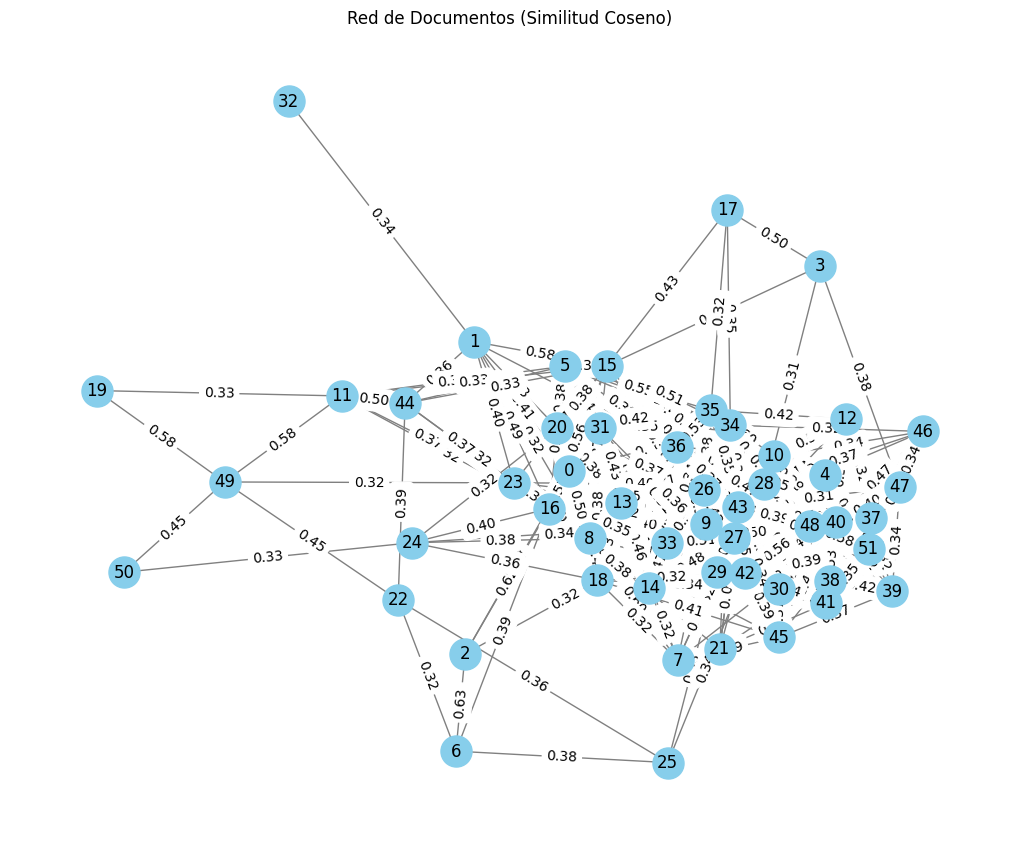

In [147]:
# Red con similitud coseno
cosine_graph = build_document_graph(cos_sim_matrix, title="Red de Documentos (Similitud Coseno)")

Grafico de Jaccard

Umbral (75º percentil): 0.16


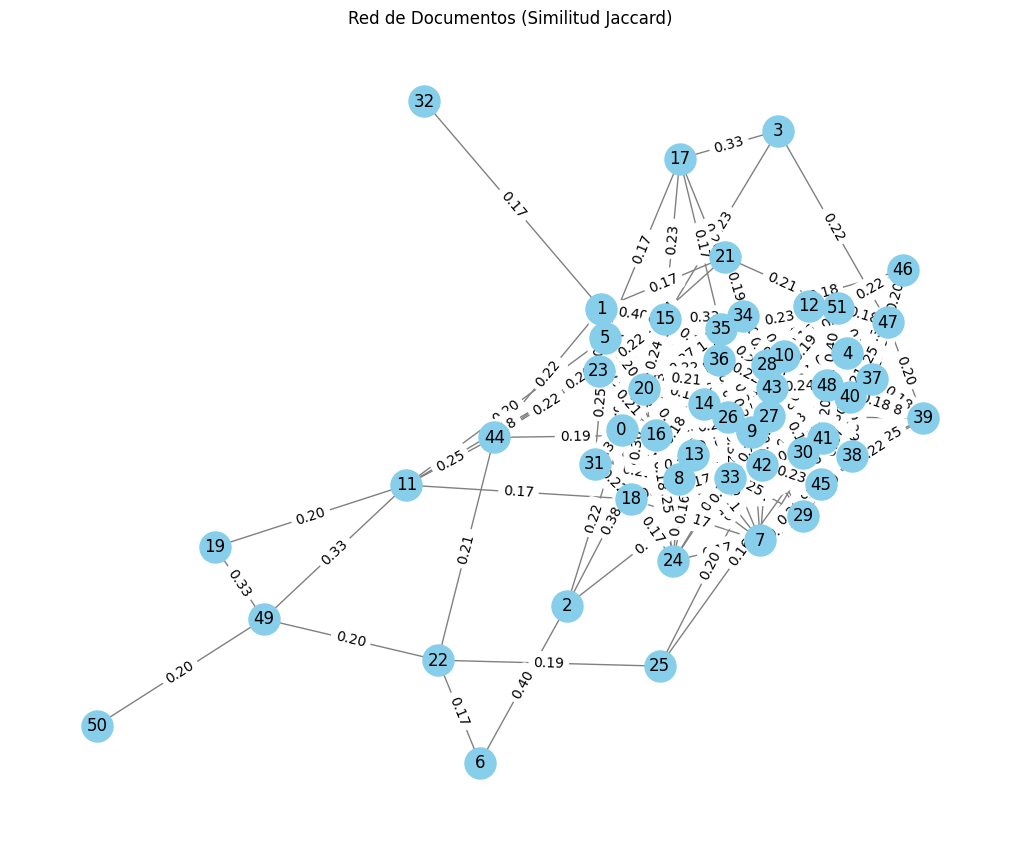

In [148]:
# Red con similitud Jaccard
jaccard_graph = build_document_graph(jacc_sim_matrix, title="Red de Documentos (Similitud Jaccard)")

### Deteccion de comunidades y la identificacion de temas

#### Funcion de deteccion de comunidades

In [149]:
def detect_communities(graph, title="Comunidades detectadas"):
    from matplotlib.colors import to_hex

    # Detectar comunidades usando Louvain
    partition = community_louvain.best_partition(graph, weight='weight')

    # Layout del grafo
    pos = nx.spring_layout(graph, seed=42)

    # Obtener colores para cada comunidad
    num_communities = max(partition.values()) + 1
    cmap = plt.colormaps['viridis']
    colors = [to_hex(cmap(i / num_communities)) for i in range(num_communities)]

    plt.figure(figsize=(10, 8))
    for node, comm_id in partition.items():
        nx.draw_networkx_nodes(graph, pos, [node], node_size=500,
                               node_color=[colors[comm_id]])

    nx.draw_networkx_edges(graph, pos, alpha=0.5)
    nx.draw_networkx_labels(graph, pos)
    plt.title(title)
    plt.axis('off')
    plt.show()

    return partition

#### Asignacion de temas a comunidades

In [150]:
def describe_communities(partition, dtm, feature_names, top_n=5):
    # Agrupar documentos por comunidad
    communities = defaultdict(list)
    for doc_id, community_id in partition.items():
        communities[community_id].append(doc_id)

    community_keywords = {}

    for community_id, doc_indices in communities.items():
        # Sumar los vectores de los documentos del grupo
        group_matrix = dtm[doc_indices]
        word_freq = np.asarray(group_matrix.sum(axis=0)).flatten()
        top_indices = word_freq.argsort()[::-1][:top_n]
        top_words = [feature_names[i] for i in top_indices]
        community_keywords[community_id] = top_words

        print(f"🧩 Comunidad {community_id} — Tema sugerido: {', '.join(top_words)}")

    return community_keywords

Comunidades por coseno

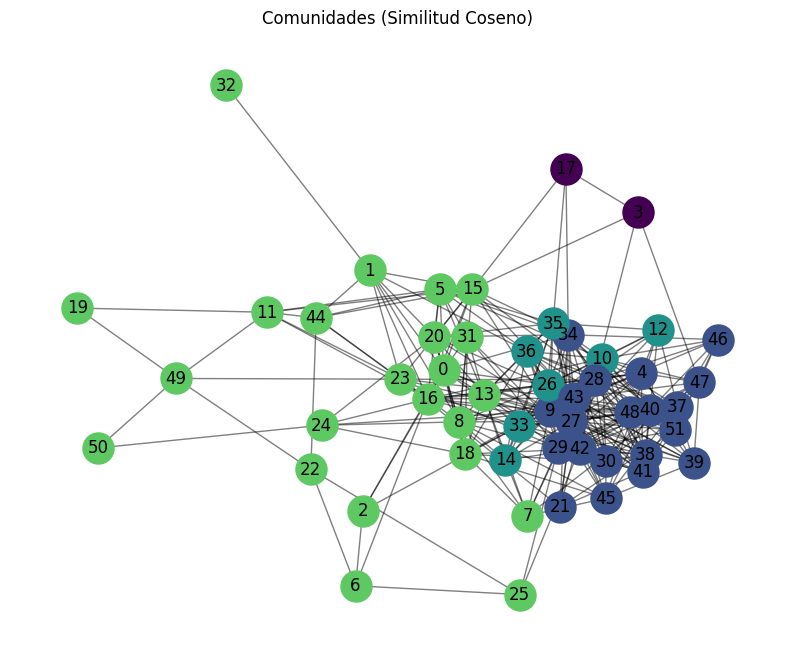

In [151]:
# Detectar comunidades
partition_cosine = detect_communities(cosine_graph, "Comunidades (Similitud Coseno)")

In [152]:
feature_names = vectorizer.get_feature_names_out()
community_keywords = describe_communities(partition_cosine, dtm, feature_names, top_n=5)

🧩 Comunidad 3 — Tema sugerido: easytouse, boring, simple, useful, confusing
🧩 Comunidad 0 — Tema sugerido: confusing, creative, difficult, incomprehensible, boring
🧩 Comunidad 1 — Tema sugerido: advanced, attractive, creative, new, convenient
🧩 Comunidad 2 — Tema sugerido: easytouse, friendly, effective, creative, clear


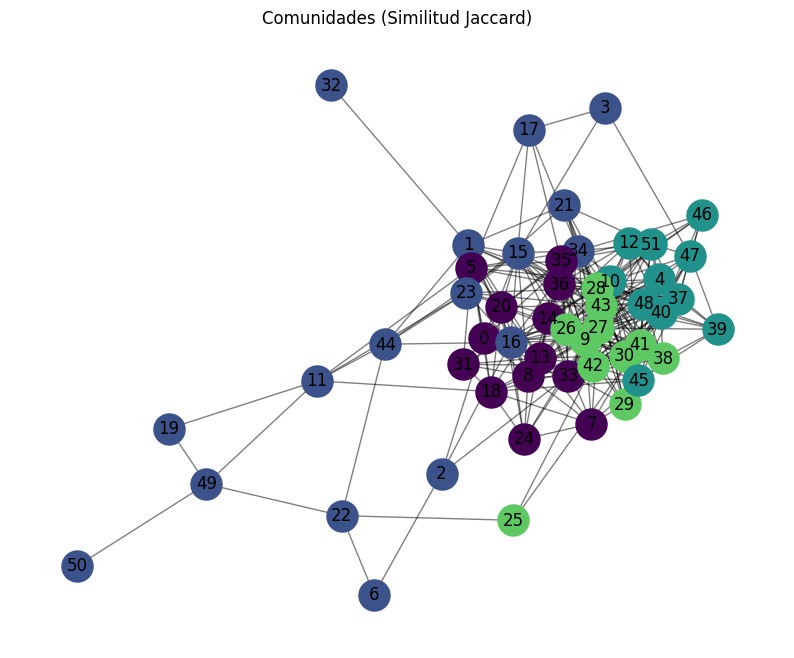

In [153]:
partition_jaccard = detect_communities(jaccard_graph, "Comunidades (Similitud Jaccard)")

In [ ]:
feature_names_jaccard = vectorizer.get_feature_names_out()
community_keywords_jaccard = describe_communities(partition_jaccard, dtm, feature_names_jaccard, top_n=5)